In [2]:
import json
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import SGD , Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from langdetect import detect

In [4]:
intents = json.loads(open(r'C:\Users\ayush\Downloads\chat4.json',encoding='utf-8').read())


In [6]:
texts = []
labels = []
classes = []
documents = []

for intent in intents['intents']:
    for pattern in intent['patterns']:
        texts.append(pattern)
        labels.append(intent['tag'])
    
    if intent['tag'] not in classes:
        classes.append(intent['tag'])

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [10]:
X = pad_sequences(sequences)
y = np.array(labels)

# Encode output labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [12]:
y = tf.keras.utils.to_categorical(y)

In [14]:
# Build the model
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],), activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
adam = Adam(learning_rate=0.001)  # Use Adam optimizer
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        53,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,394 (384.35 KB)

 Trainable params: 97,498 (380.85 KB)

 Non-trainable params: 896 (3.50 KB)

In [20]:

history = model.fit(X, y, epochs=200, batch_size=8, verbose=1, validation_split=0.3)


Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0298 - loss: 4.6757 - val_accuracy: 0.0000e+00 - val_loss: 11.1120
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0437 - loss: 4.0711 - val_accuracy: 0.0244 - val_loss: 7.4187
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0309 - loss: 4.2395 - val_accuracy: 0.0244 - val_loss: 6.1158
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0449 - loss: 4.0212 - val_accuracy: 0.0000e+00 - val_loss: 5.5404
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0608 - loss: 3.5010 - val_accuracy: 0.0000e+00 - val_loss: 5.2218
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1054 - loss: 3.6539 - val_accuracy: 0.0244 - val_loss: 4.8076
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0398 - loss: 3.6947 - val_accuracy: 0.0244 - val_loss: 4.4965
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1443 - loss: 3.3955 - val_accura

In [22]:
final_accuracy = history.history['accuracy'][-1]
print(f"Final training accuracy: {final_accuracy * 100}%")

Final training accuracy: 88.29787373542786%


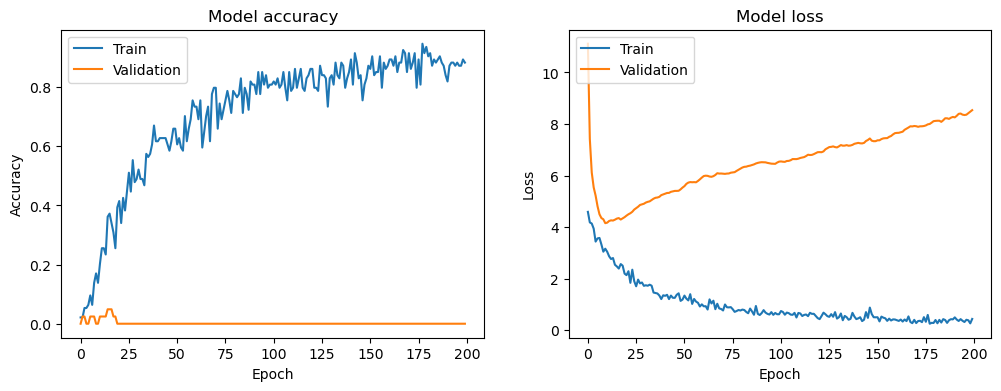

In [24]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [26]:
# Save the model and tokenizer
model.save('chatbot_model.keras')
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [28]:
import json
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

In [32]:
# Load your original intents JSON
intents = json.loads(open(r'C:\Users\ayush\Downloads\chat4.json',encoding='utf-8').read())

# Show information JSON string
shows_json_string = '''
[
    {
        "show": "3-D Film Show",
        "time": "10:30, 12:30, 2:30 & 5:30)",
        "costs": [
            {
                "type": "General Visitor",
                "cost": "25/-"
            },
            {
                "type": "Private School Group",
                "cost": "15/-"
            },
            {
                "type": "Govt. School Group",
                "cost": "10/-"
            }
        ]
    },
    {
        "show": "Science on a Sphere(SOS)",
        "time": "11:00, 1:00, 3:00, & 5:00)",
        "costs": [
            {
                "type": "General Visitor",
                "cost": "30/-"
            },
            {
                "type": "School Group",
                "cost": "20/-"
            }
        ]
    },
    {
        "show": "Planetarium Show",
        "time": "12:00 & 4:30)",
        "costs": [
            {
                "type": "General Visitor",
                "cost": "20/-"
            },
            {
                "type": "Private School Group",
                "cost": "10/-"
            },
            {
                "type": "Govt. School Group",
                "cost": "5/-"
            }
        ]
    },
    {
        "show": "Super Cold Show",
        "time": "11:30 and 3:30)",
        "costs": [
            {
                "type": "General Public",
                "cost": "10/-"
            },
            {
                "type": "School Group",
                "cost": "5/-"
            }
        ]
    },
    {
        "show": "Mock-up Coal Mine Gallery",
        "time": "11:00, 12:00, 2:00, 3:00, 4:00 & 5:00)",
        "costs": [
            {
                "type": "General Public",
                "cost": "10/-"
            },
            {
                "type": "Govt. / Private School Group",
                "cost": "5/-"
            }
        ]
    }
]
'''


In [34]:
#pip install googletrans==4.0.0-rc1


In [36]:
from googletrans import Translator


In [38]:
# Create a Translator object
translator = Translator()

# Translate text from one language to another
text = ""
translated = translator.translate(text, src='en', dest='es')  # Translating from English to Spanish


TypeError: the JSON object must be str, bytes or bytearray, not NoneType

In [ ]:
# Function to predict intent and generate a response
def predict_intent(text):
    language = detect_language(text)
    print(f"Detected language: {language}")
    
    # Simple keyword matching for intent detection
    for intent in intents['intents']:
        for pattern in intent['patterns']:
            if pattern.lower() in text.lower():
                return intent['tag']

    # If no intent matches, check if it relates to a show
    return "show_info"


In [ ]:
# Function to get the response based on the intent
def get_response(intent_tag):
    for intent in intents['intents']:
        if intent['tag'] == intent_tag:
            return intent['responses'][0]

In [ ]:
# Function to fetch show information based on user query
def get_show_info(show_name):
    for show in shows_data:
        if show_name.lower() in show['show'].lower():
            return show
    return None

In [ ]:
def chatbot():
    while True:
        user_input = input("You: ")
        if user_input.lower() == "quit":
            print("Bot: Goodbye! Have a great day!")
            break

        intent_tag = predict_intent(user_input)
        
        if intent_tag == "show_info":
            show_info = get_show_info(user_input)
            if show_info:
                response = f"{show_info['show']} is available at {show_info['time']}. Costs: {', '.join([f'{c['type']}: {c['cost']}' for c in show_info['costs']])}"
            else:
                response = "Sorry, I couldn't find that show."
        else:
            response = get_response(intent_tag)
        
        print(f"Bot: {response}")

In [52]:
while True:
    message = input("You: ")
    text = message
    translated = translator.translate(text, src='en', dest='hi')
    if message.lower() == "quit":
        break
    response = get_response(message)
    print(f"Bot: {response}")
    print(f"Translated Text: {translated.text}")

You:  hello


NameError: name 'get_response' is not defined

In [ ]:
# Import libraries
from transformers import pipeline
import nltk

# Initialize the Google Translator
translator = Translator()

# Load pre-trained model for text generation
text_generator = pipeline("text-generation", model="gpt2")

# Function to generate chatbot response
def get_response(user_input):
    response = text_generator(user_input, max_length=50, num_return_sequences=1)
    return response[0]['generated_text']

# Function for translation using Google Translate
def translate(text, src_lang="auto", tgt_lang="es"):
    translation = translator.translate(text, src=src_lang, dest=tgt_lang)
    return translation.text

# Multilingual Chatbot Function
def multilingual_chatbot(user_input, user_language="en"):
    # Translate user input to English (if it's not in English)
    if user_language != "en":
        translated_input = translate(user_input, src_lang=user_language, tgt_lang="en")
    else:
        translated_input = user_input
    
    # Get the chatbot response in English
    response = get_response(translated_input)
    
    # Translate the response back to the user's preferred language
    if user_language != "en":
        translated_response = translate(response, src_lang="en", tgt_lang=user_language)
    else:
        translated_response = response
    
    return translated_response

# Example usage
user_input = "¿Cómo estás?"
user_language = "es"  # Spanish

# Get chatbot response in the user's language
response = multilingual_chatbot(user_input, user_language)
print(f"Chatbot response: {response}")
